In [1]:
import numpy as np
data = np.loadtxt('wine.data', delimiter=',')

In [2]:
features_data, labels = data[:,1:], data[:,0]

**3. a) Use leave-one-out cross-validation (LOOCV) to estimate the accuracy of the classifier and
also to estimate the 3 ×3 confusion matrix.**

In [3]:
#Computes squared Euclidean distance between two vectors 
def squared_dist(x,y):
    return np.sum(np.square(x-y))

In [4]:
#predicts the label for a data row using leave-one-out cross-validation
def find_label_for_record_at_index(i,features_data,labels):
    training_data = np.delete(features_data, i, 0)
    train_lebels = np.delete(labels, i, 0)
    x = features_data[i]
    distances = [squared_dist(x,training_data[j,]) for j in range(len(train_lebels))]
    index = np.argmin(distances)
    return int(train_lebels[index])
    

In [5]:
predictions = [find_label_for_record_at_index(i,features_data,labels) for i in range(len(labels))]
acc_predictions = np.equal(predictions,labels)
accuracy = float(np.sum(acc_predictions))/len(labels)
print("Accuracy of LOOCV :" ,accuracy)

Accuracy of LOOCV : 0.7696629213483146


In [6]:
#Confusion Matrix

#initializing the 3x3 matrix
dimensions = (3, 3)
confusion_matrix = np.zeros(dimensions)
#print(confusion_matrix)
for a,b in zip(labels,predictions):
    #I am suubtracting 1 because our labels are 1,2,3 and indexes are 0,1,2
    confusion_matrix[int(a)-1][b-1] = confusion_matrix[int(a)-1][b-1] + 1
    #print(str(int(a))+" "+str(b))
    
print("Confusion matrix for LOOCV :")    
confusion_matrix

Confusion matrix for LOOCV :


array([[52.,  3.,  4.],
       [ 5., 54., 12.],
       [ 3., 14., 31.]])

**3 b) Estimate the accuracy of the 1-NN classifier using k-fold cross-validation using 20 different choices
of k that are fairly well spread out across the range 2 to 100. Plot these estimates: put k on the
horizontal axis and accuracy estimate on the vertical axis.**

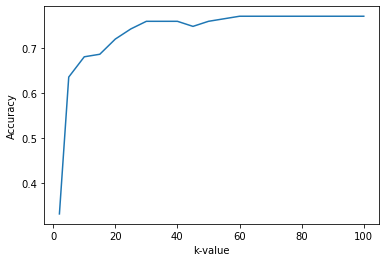

In [7]:
accuracy_dict = {}

#picking 20 k values for folds
folds = [2,5,10,15,20,25,30,35,40,45,50,60,65,70,75,80,85,90,95,100]

# Using for all the folds
for k in folds:
    k_fold_train_data = np.array_split(features_data, k)
    k_fold_labels = np.array_split(labels, k)
    
    predicted_actual = []
    
    #print(len(k_fold_train_data))
    for fold in range(len(k_fold_train_data)):

        #print("fold ",fold)
        hold_out_data = k_fold_train_data[fold]
        hold_out_labels = k_fold_labels[fold]
        
        #creating copy of list to keep original list intact
        temp_train_data = k_fold_train_data.copy()
        temp_labels = k_fold_labels.copy()
        
        #removing the holdout set
        del temp_train_data[fold]
        del temp_labels[fold]

        #flattening all the groups to create single training data exlcuing the fold we are working on
        training_data = np.concatenate( temp_train_data, axis=0 )
        train_labels = np.concatenate( temp_labels, axis=0 )
        #print("size of hold our set ",len(k_fold_train_data[fold]))
        for i in range(len(hold_out_data)):
            x = hold_out_data[i]
            distances = [squared_dist(x,training_data[j,]) for j in range(len(train_labels))]
            index = np.argmin(distances)

            predicted_actual.append([int(train_labels[index]), int(hold_out_labels[i])])
    
    #print("k = ",k)
    predicted_actual_arr = np.asarray(predicted_actual)
    #print(predicted_actual_arr[:,0])
    predictions = predicted_actual_arr[:,0]
    actual_labels = predicted_actual_arr[:,1]
    correct_predictions = np.equal(predictions,actual_labels)
    #print(err_predictions)
    accuracy = float(np.sum(correct_predictions))/len(predicted_actual)
    #print("Accuracy ",accuracy)
    accuracy_dict[k] = accuracy

    
import matplotlib.pylab as plt

lists = sorted(accuracy_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()    

**3 c) Use leave-one-out cross-validation (LOOCV) to estimate the accuracy of the classifier and
also to estimate the 3 ×3 confusion matrix.**

In [8]:

#normalizing all the columns to [0,1]
features_data_normed = features_data / features_data.max(axis=0)

In [9]:
#Now calculating the error with normalized feature data
predictions = [find_label_for_record_at_index(i,features_data_normed,labels) for i in range(len(labels))]
acc_predictions = np.equal(predictions,labels)
acc = float(np.sum(acc_predictions))/len(labels)
print("Accuracy of LOOCV with normalized data:" ,acc)

Accuracy of LOOCV with normalized data: 0.9606741573033708


Clearly the normalization has increased the accuracy to 96%